In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
bookclubs = pd.read_csv('GoodReads_bookclubs.csv')

In [3]:
list(bookclubs.columns.values)

['Group_Name',
 'avg_time_per_book',
 'bookshelf_link',
 'category',
 'curr_reading_authors',
 'curr_reading_titles',
 'group_type',
 'location',
 'member_cnt',
 'tags']

Text(0.5,1,'Histogram of Member Count')

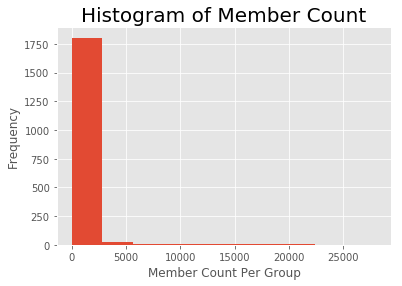

In [11]:
plt.hist(bookclubs['member_cnt'])
plt.xlabel('Member Count Per Group')
plt.ylabel('Frequency')
plt.title('Histogram of Member Count', fontsize=20)

Text(0.5,1,'Histogram of Member Count (Small Bookclubs)')

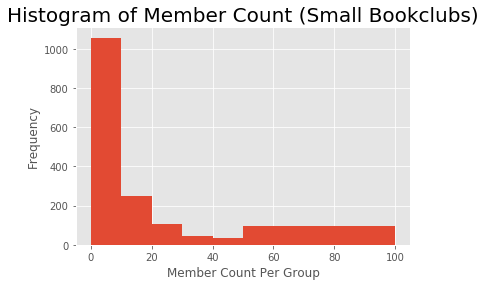

In [12]:
plt.hist(bookclubs['member_cnt'], bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel('Member Count Per Group')
plt.ylabel('Frequency')
plt.title('Histogram of Member Count (Small Bookclubs)', fontsize=20)

(array([613., 443., 159.,  89.,  58.,  51.]),
 array([ 0,  5, 10, 15, 20, 25, 30]),
 <a list of 6 Patch objects>)

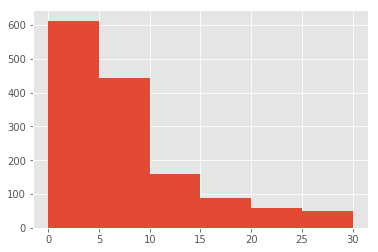

In [5]:
plt.hist(bookclubs['member_cnt'], bins=[0, 5,10,15,20,25,30])

Text(0.5,1,'Histogram of Member Count (Large Bookclubs)')

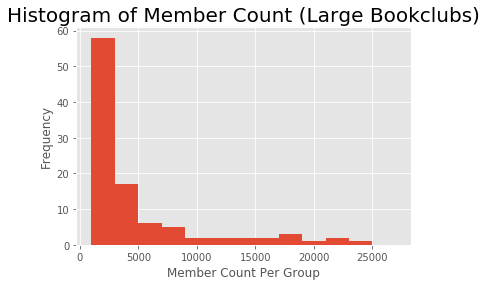

In [13]:
plt.hist(bookclubs['member_cnt'], bins=[1000, 3000,5000,7000,9000,11000,13000,15000,17000,19000,21000,23000,25000,27000])
plt.xlabel('Member Count Per Group')
plt.ylabel('Frequency')
plt.title('Histogram of Member Count (Large Bookclubs)', fontsize=20)

(array([1., 1., 1., 2., 0., 1., 2., 0., 1., 0., 0., 0.]),
 array([15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000,
        24000, 25000, 26000, 27000]),
 <a list of 12 Patch objects>)

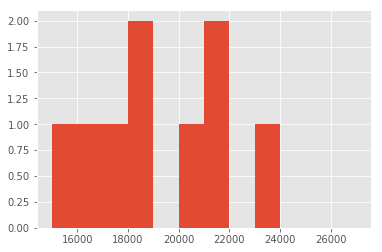

In [9]:
plt.hist(bookclubs['member_cnt'], bins=[15000, 16000,17000,18000,19000,20000,21000,22000,23000, 24000,25000,26000,27000])

(array([3., 1., 2., 1., 0.]),
 array([17000, 19000, 21000, 23000, 25000, 27000]),
 <a list of 5 Patch objects>)

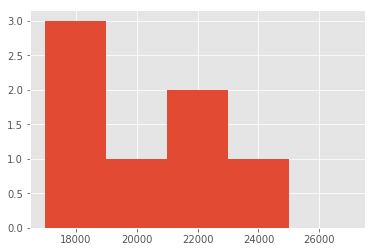

In [8]:
plt.hist(bookclubs['member_cnt'], bins=[17000, 19000,21000,23000,25000,27000])

In [26]:
#(bookclubs['member_cnt']).median()
#Country[Country['coastal']==False].country.count()
(bookclubs['member_cnt']<8).value_counts()

True     935
False    918
Name: member_cnt, dtype: int64

In [37]:
small_clubs = bookclubs[bookclubs['member_cnt']<8]
big_clubs = bookclubs[bookclubs['member_cnt']>=8]

(array([ 3., 34., 55.,  3., 11.,  3.,  0.]),
 array([ 10,  20,  30,  40,  50, 100, 200, 300]),
 <a list of 7 Patch objects>)

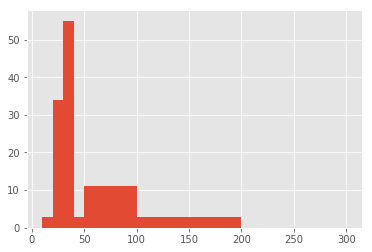

In [42]:
plt.hist(small_clubs['avg_time_per_book'], bins=[10,20,30,40,50,100,200,300])
#print(list(small_clubs.columns.values))
#type(small_clubs)
#type(bookclubs)

(array([ 12.,  73., 162.,  12.,  40.,   6.,   1.]),
 array([ 10,  20,  30,  40,  50, 100, 200, 300]),
 <a list of 7 Patch objects>)

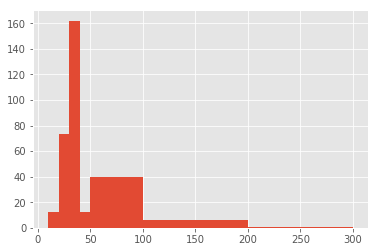

In [43]:
plt.hist(big_clubs['avg_time_per_book'], bins=[10,20,30,40,50,100,200,300])

In [8]:
#remove rows where average time to read a book is missing:
missings_avg_read_time = bookclubs[bookclubs['avg_time_per_book'] <= 0]
has_avg_read_time = bookclubs[bookclubs['avg_time_per_book'] > 0]

(array([1.398e+03, 1.300e+01, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([2.00000e+00, 2.15670e+03, 4.31140e+03, 6.46610e+03, 8.62080e+03,
        1.07755e+04, 1.29302e+04, 1.50849e+04, 1.72396e+04, 1.93943e+04,
        2.15490e+04]),
 <a list of 10 Patch objects>)

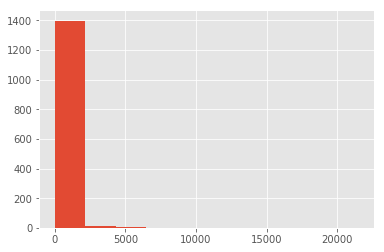

In [9]:
plt.hist(missings_avg_read_time['member_cnt'])

(array([401.,  14.,   2.,   3.,   3.,   2.,   2.,   2.,   1.,   1.]),
 array([2.00000e+00, 2.80310e+03, 5.60420e+03, 8.40530e+03, 1.12064e+04,
        1.40075e+04, 1.68086e+04, 1.96097e+04, 2.24108e+04, 2.52119e+04,
        2.80130e+04]),
 <a list of 10 Patch objects>)

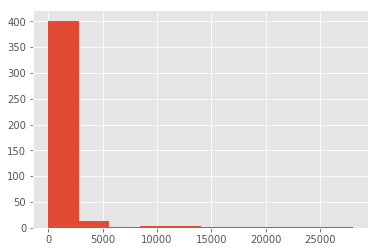

In [10]:
plt.hist(has_avg_read_time['member_cnt'])

In [14]:
has_avg_read_time_large_grps = has_avg_read_time[has_avg_read_time['member_cnt'] >= 1000]

(array([34.,  8.,  4.,  1.,  3.,  3.,  1.,  2.,  1.,  1.]),
 array([ 1002. ,  3703.1,  6404.2,  9105.3, 11806.4, 14507.5, 17208.6,
        19909.7, 22610.8, 25311.9, 28013. ]),
 <a list of 10 Patch objects>)

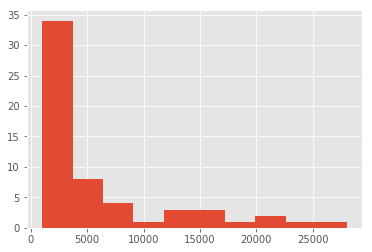

In [15]:
plt.hist(has_avg_read_time_large_grps['member_cnt'])

In [16]:
len(has_avg_read_time_large_grps)

58

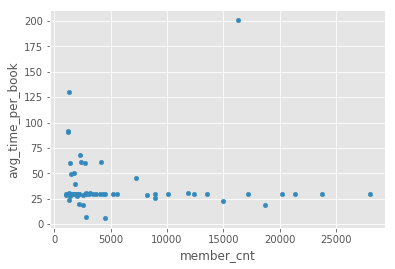

In [18]:
has_avg_read_time_large_grps.plot.scatter(x='member_cnt', y='avg_time_per_book')